# 01_Statistics.ipynb
EDA + thống kê dữ liệu (không đụng model).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

RAW_DIR   = Path("./ Data")
OUT_DIR   = Path("./DataAfterProcessing")
PROC_DIR  = OUT_DIR / "Processed"
STATS_DIR = OUT_DIR / "Stats"
STATS_DIR.mkdir(parents=True, exist_ok=True)

F_PRODUCTS_ENRICHED = PROC_DIR / "products_enriched.csv"
F_TX_LONG          = PROC_DIR / "transactions_long.csv"

products = pd.read_csv(F_PRODUCTS_ENRICHED)
tx_long  = pd.read_csv(F_TX_LONG)

def nice_grid():
    plt.grid(True, linestyle="--", alpha=0.35)

print("products:", products.shape, "| tx_long:", tx_long.shape)
products.head(2)

products: (12877, 15) | tx_long: (49786, 11)


,product_id_str,barcode,product_name_vi,price,brand_name,country_name,category_id,category_name,parent_category_id,parent_category_name,category_path,description,full_metadata,n_appear,popularity_norm
0,68311cba419bc51ab2ee5aa3,8934868172239,Dầu Gội Nam Sạch Gàu Clear Men Hương Gió Biển ...,249000,Clear Men,UNKNOWN_COUNTRY,682fdf11419bc50c9f24af11,"Dầu Gội, Dầu Xả",682fdf06419bc50c9f24aefb,Chăm Sóc Tóc,Chăm Sóc Cá Nhân > Chăm Sóc Nam Giới > Chăm Só...,"ƯU ĐIỂM NỔI BẬT:– SẠCH GÀU, HẾT NGỨA:Công nghệ...",Dầu Gội Nam Sạch Gàu Clear Men Hương Gió Biển ...,5,0.078125
1,68311cba419bc51ab2ee5aa5,8934868152576,Dầu Gội Sạch Gàu Clear Bạc Hà Mát Lạnh Chai 1.4kg,370000,Clear,UNKNOWN_COUNTRY,682fdf11419bc50c9f24af11,"Dầu Gội, Dầu Xả",682fdf06419bc50c9f24aefb,Chăm Sóc Tóc,Chăm Sóc Cá Nhân > Chăm Sóc Nam Giới > Chăm Só...,Thời tiết nóng ẩm cùng khói bụi là nguyên nhân...,Dầu Gội Sạch Gàu Clear Bạc Hà Mát Lạnh Chai 1....,6,0.093750


In [2]:
n_products = products["product_id_str"].nunique()
n_brands   = products["brand_name"].nunique()
n_cats     = products["category_name"].nunique()
n_parent   = products["parent_category_name"].replace("", np.nan).nunique()
n_bills    = tx_long["bill_id"].nunique()

print("=== TỔNG QUAN DỮ LIỆU ===")
print("Số sản phẩm:", n_products)
print("Số thương hiệu:", n_brands)
print("Số category (child):", n_cats)
print("Số parent category:", n_parent)
print("Số bill:", n_bills)

top_parent = (products.groupby("parent_category_name")["product_id_str"].nunique()
              .sort_values(ascending=False).head(15))
top_parent


=== TỔNG QUAN DỮ LIỆU ===
Số sản phẩm: 12877
Số thương hiệu: 1431
Số category (child): 261
Số parent category: 86
Số bill: 4430


parent_category_name
Dụng Cụ Bếp, Phòng Ăn       1033
Bánh Kẹo                     615
Mì, Bún, Topokki Ăn Liền     547
Bánh Các Loại                490
Chăm Sóc Tóc                 424
Sốt, Gia Vị Các Loại         417
Làm Sạch Cơ Thể              411
Nước Ngọt                    364
Hạt, Trái Cây Sấy            317
Sữa Nước                     315
Snack, Ăn Vặt                312
Đồ Uống                      267
Rau Củ                       258
Chăm Sóc Da Mặt              244
Rượu                         238
Name: product_id_str, dtype: int64

Top 20 sản phẩm xuất hiện nhiều nhất:


,product_id_str,n_appear,product_name_vi,category_path,brand_name,pct_bills
0,68312a85419bc51ab2ee7277,64,Cháo Ăn Liền Vifon Vị Cá Gói 50g,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",UNKNOWN_BRAND,0.014447
1,68312d4b419bc51ab2ee76ef,56,Miến Phú Hương Vị Gà Gói 53G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",Phú Hương,0.012641
2,68312d66419bc51ab2ee771b,54,Phở Trộn Long Triều Bò Tái Lăn Vifon Gói 90G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",VIFON,0.012190
3,68312a93419bc51ab2ee728e,52,Cháo Ăn Liền Ottogi Gà Dinh Dưỡng Hộp 285G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",Ottogi,0.011738
4,68312a89419bc51ab2ee727e,52,Cháo Ăn Liền Vị Rau Củ Dongwon 285g,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",Dongwon,0.011738
5,68312a93419bc51ab2ee728f,51,Cháo Ăn Liền Ottogi Bào Ngư Hộp 285G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",Ottogi,0.011512
6,68312d66419bc51ab2ee771a,51,Phở Trộn Long Triều Hải Sản Cay Vifon Gói 90G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",VIFON,0.011512
7,68313957419bc51ab2ee89ea,51,Khăn Bếp Đa Năng Bless You À La Vie 2 Lớp Lốc ...,"Hóa Phẩm, Vệ Sinh > Chăm Sóc Nhà Cửa > Khăn Giấy",Bless You,0.011512
8,6831397a419bc51ab2ee8a22,51,Khăn Giấy Rút Paseo 2 Lớp Gói 220 Tờ,"Hóa Phẩm, Vệ Sinh > Chăm Sóc Nhà Cửa > Khăn Giấy",Paseo,0.011512
9,68312d45419bc51ab2ee76e5,51,Miến Ăn Liền Vị Lẩu Cay Ottogi Ly 38.1G,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",Ottogi,0.011512


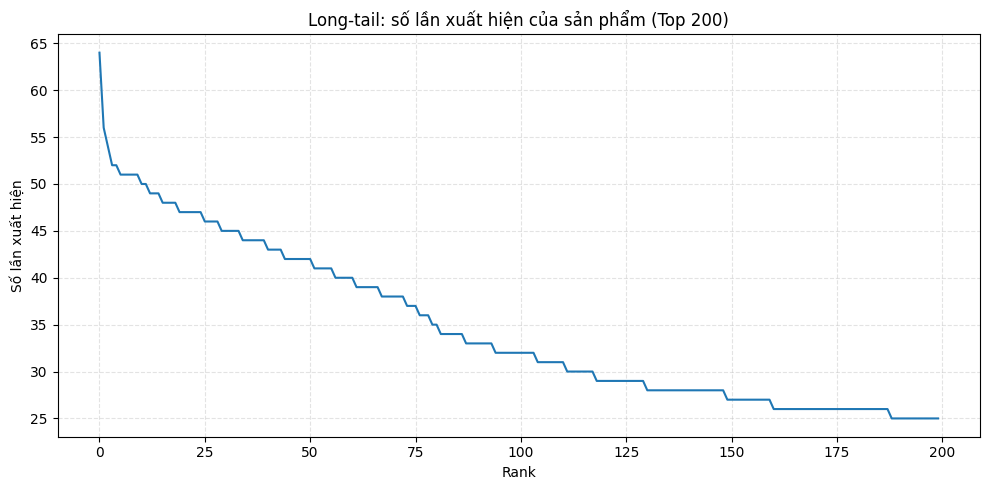

In [3]:
prod_freq = (tx_long["product_id_str"].value_counts()
             .rename("n_appear").reset_index()
             .rename(columns={"index":"product_id_str"}))

prod_freq = prod_freq.merge(products[["product_id_str","product_name_vi","category_path","brand_name"]], on="product_id_str", how="left")
prod_freq["pct_bills"] = prod_freq["n_appear"] / n_bills

print("Top 20 sản phẩm xuất hiện nhiều nhất:")
display(prod_freq.head(20))

# Plot
plt.figure(figsize=(10,5))
plt.plot(np.sort(prod_freq["n_appear"].values)[::-1][:200])
plt.title("Long-tail: số lần xuất hiện của sản phẩm (Top 200)")
plt.xlabel("Rank")
plt.ylabel("Số lần xuất hiện")
nice_grid()
plt.tight_layout()
plt.show()


Top 20 ngành hàng (category_path) theo số bill có xuất hiện:


,category_path,n_bills,pct_bills
11,"Bánh Kẹo > Snack, Ăn Vặt > Bánh Snack",2310,0.521445
77,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",1667,0.376298
78,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",1502,0.339052
76,"Gạo, Mì, Bún, Đậu > Mì, Bún, Topokki Ăn Liền >...",1492,0.336795
208,Đồ Uống > Nước Ngọt > Nước Có Ga,1250,0.282167
207,Đồ Uống > Bia,1124,0.253725
25,Chăm Sóc Cá Nhân > Chăm Sóc Cơ Thể > Chăm Sóc ...,887,0.200226
30,Chăm Sóc Cá Nhân > Chăm Sóc Cơ Thể > Làm Sạch ...,859,0.193905
21,Chăm Sóc Cá Nhân > Chăm Sóc Cơ Thể > Chăm Sóc ...,859,0.193905
82,"Hóa Phẩm, Vệ Sinh > Chăm Sóc Nhà Cửa > Giấy Vệ...",832,0.187810


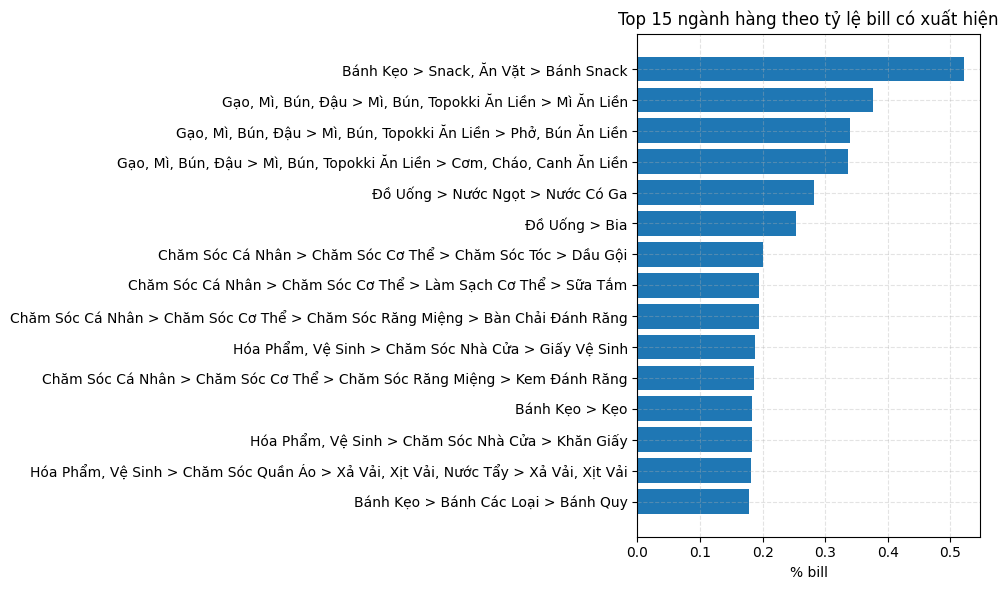

In [4]:
# Theo category_path (Parent > Child)
cat_bill = tx_long.groupby("category_path")["bill_id"].nunique().rename("n_bills").reset_index()
cat_bill["pct_bills"] = cat_bill["n_bills"] / n_bills
cat_bill = cat_bill.sort_values("n_bills", ascending=False)

print("Top 20 ngành hàng (category_path) theo số bill có xuất hiện:")
display(cat_bill.head(20))

plt.figure(figsize=(10,6))
topk = cat_bill.head(15).iloc[::-1]
plt.barh(topk["category_path"], topk["pct_bills"])
plt.title("Top 15 ngành hàng theo tỷ lệ bill có xuất hiện")
plt.xlabel("% bill")
nice_grid()
plt.tight_layout()
plt.show()

cat_bill.to_csv(STATS_DIR / "category_share_in_bills.csv", index=False, encoding="utf-8")

=== SỐ SP MỖI BILL ===
count    4430.000000
mean       11.238375
std         3.598132
min         5.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        22.000000
Name: n_items, dtype: float64


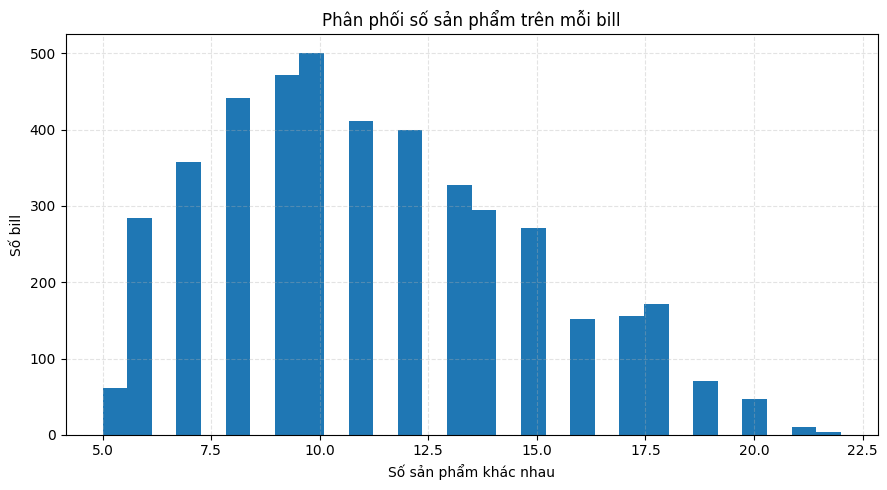


=== SỐ NGÀNH HÀNG MỖI BILL ===
count    4430.000000
mean        8.287133
std         2.802555
min         2.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: n_categories, dtype: float64


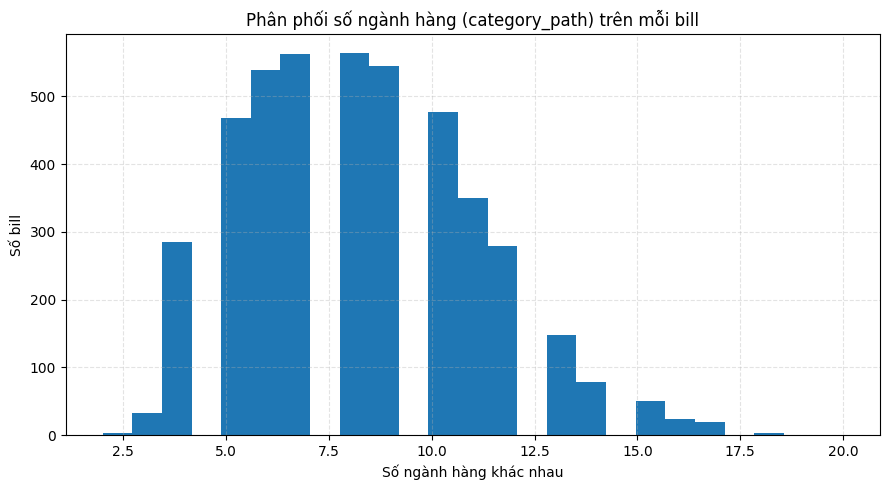

In [5]:
items_per_bill = tx_long.groupby("bill_id")["product_id_str"].nunique().rename("n_items")
cats_per_bill  = tx_long.groupby("bill_id")["category_path"].nunique().rename("n_categories")

print("=== SỐ SP MỖI BILL ===")
print(items_per_bill.describe())

plt.figure(figsize=(9,5))
plt.hist(items_per_bill, bins=30)
plt.title("Phân phối số sản phẩm trên mỗi bill")
plt.xlabel("Số sản phẩm khác nhau")
plt.ylabel("Số bill")
nice_grid()
plt.tight_layout()
plt.show()

print("\n=== SỐ NGÀNH HÀNG MỖI BILL ===")
print(cats_per_bill.describe())

plt.figure(figsize=(9,5))
plt.hist(cats_per_bill, bins=25)
plt.title("Phân phối số ngành hàng (category_path) trên mỗi bill")
plt.xlabel("Số ngành hàng khác nhau")
plt.ylabel("Số bill")
nice_grid()
plt.tight_layout()
plt.show()

items_per_bill.to_csv(STATS_DIR / "items_per_bill.csv", index=True, encoding="utf-8")
cats_per_bill.to_csv(STATS_DIR / "cats_per_bill.csv", index=True, encoding="utf-8")


Top 20 brand phủ nhiều ngành hàng nhất:


,brand_name,n_categories
1285,UNKNOWN_BRAND,220
214,Choice L,71
437,Good Today,22
942,Ottogi,22
656,LOTTE,16
169,CP,15
215,Choice-L,15
6,365 Fresh,15
216,Cholimex,14
992,Ponie,13


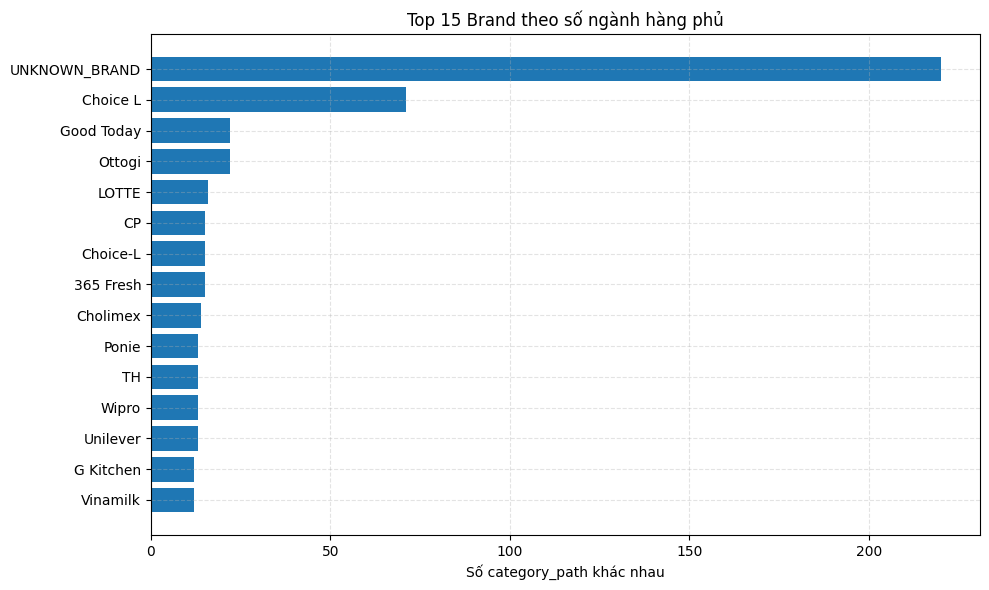

In [6]:
brand_pen = (products.groupby("brand_name")["category_path"].nunique()
             .rename("n_categories").reset_index()
             .sort_values("n_categories", ascending=False))

print("Top 20 brand phủ nhiều ngành hàng nhất:")
display(brand_pen.head(20))

plt.figure(figsize=(10,6))
topk = brand_pen.head(15).iloc[::-1]
plt.barh(topk["brand_name"], topk["n_categories"])
plt.title("Top 15 Brand theo số ngành hàng phủ")
plt.xlabel("Số category_path khác nhau")
nice_grid()
plt.tight_layout()
plt.show()

brand_pen.to_csv(STATS_DIR / "brand_penetration.csv", index=False, encoding="utf-8")